# Stock Market Clustering Analysis




### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Importing essential libraries for data handling and manipulation
import numpy as np
import pandas as pd

# Utilizing visualization libraries for creating insightful plots
import matplotlib.pyplot as plt
import seaborn as sns

# Applying z-score scaling to standardize the data
from sklearn.preprocessing import StandardScaler

# Using scipy for computing distances between data points
from scipy.spatial.distance import cdist, pdist

# Using scikit-learn for k-means clustering and silhouette score calculations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Using scikit-learn for hierarchical clustering, cophenetic correlation computation, and dendrogram creation
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Using Yellowbrick for visualizing the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")


## Data Overview

- Observations
- Sanity checks

In [2]:
#importing data 
df = pd.read_excel(r"C:\Users\SHREYA\Downloads\stock_data.xlsx") 

In [3]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [4]:
df.shape


(340, 15)

<h4>Observation:</h4>The dataset has 340 rows and 15 columns.

In [5]:
# print the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<h4>Observation:</h4>
11 columns are numeric and 4 are of object types

In [6]:
#checking for duplicates
df.duplicated().sum()

0

<h4>Observation:</h4>
There are no duplicate rows in the dataset

In [7]:
#checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<h4>Observation:</h4>
There are no missing values in the dataframe

In [8]:
# converting columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [9]:
#dropping Ticker Symbol column as it provides no information
df.drop("Ticker Symbol", axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

<h4>Observation:</h4>
-There are 14 columns in the dataframe now
<br>-11 colums are numeric datatype and 3 are catagory datatype

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [12]:
#summarizing categorical data
df.describe(exclude="number").T

,count,unique,top,freq
Security,340,340,3M Company,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


<h4>Observation:</h4>
-There are 11 uniqiue sectors and 104 unique subindustries in the dataframe

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [13]:
def histogram_boxplot(data, feature, figsize=(10,6)):
    """
    Boxplot and histogram combined with KDE curve

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10, 6))
    """
    # Create subplots with shared x-axis
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="green")

    # Creating Histogram with KDE curve
    sns.histplot(data=data, x=feature, color="green", kde=True, ax=ax_hist)

    # Adding mean and median lines to the histogram
    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    ax_box.set(xlabel='')
    ax_hist.set_xlabel(feature)
    ax_hist.legend()

  
    plt.tight_layout()

  
    plt.show()



<h3>Q-1 What does the distribution of stock prices look like?

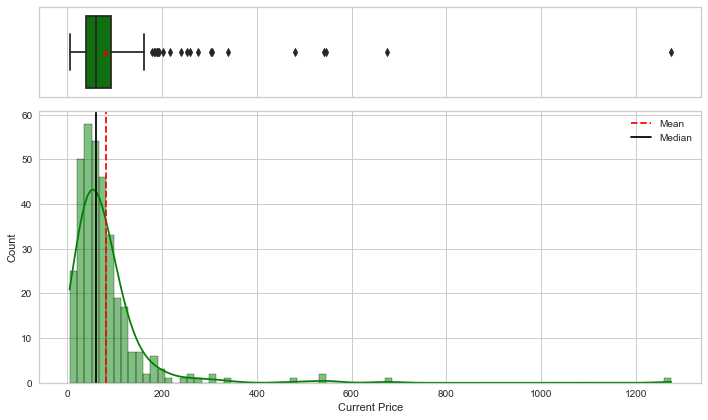

In [14]:
histogram_boxplot(df, "Current Price")

<h4>Observation:</h4>
-The stock price is heavily skewed on the right as evident by the long tail. 
<br>-There is presence of outliers on the right hand side.

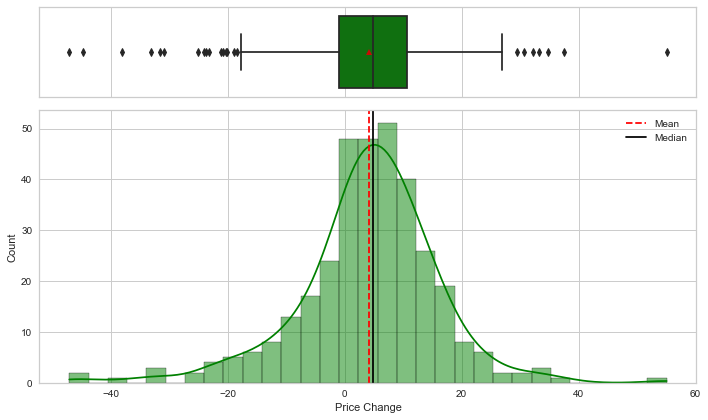

In [15]:
histogram_boxplot(df, "Price Change")

<h4>Observation:</h4>
-The distribution of price change is approximately normal
<br>-There are outliers present at both extremes, particularly on the lower end.

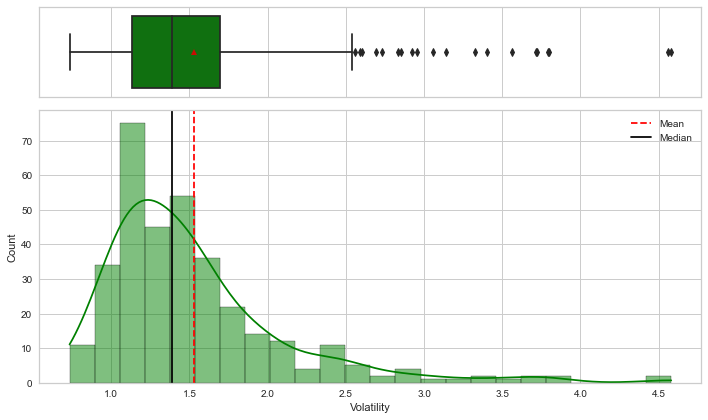

In [16]:
histogram_boxplot(df, "Volatility")

<h4>Observation:</h4>
-Volatility has a right skew.
<br>-Outliers are present on the upper end.

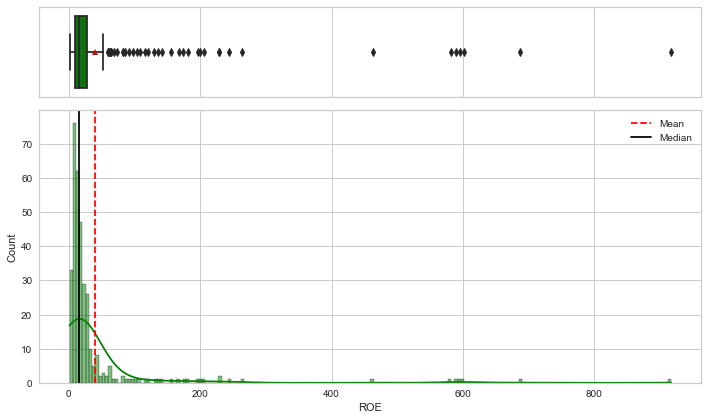

In [17]:
histogram_boxplot(df, "ROE")

<h4>Observation:</h4>
-ROE has apronounced right skewness, indicating a concentration of values towards higher levels. 
<br>-There is a notable presence of outliers on the upper end.

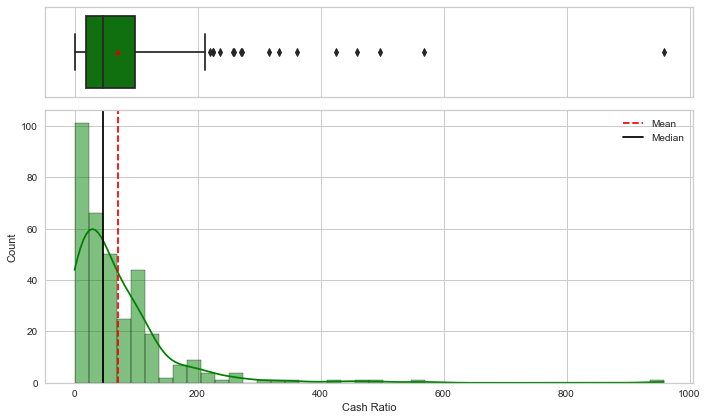

In [18]:
histogram_boxplot(df, "Cash Ratio")

<h4>Observation:</h4>
-Cash ratio is highly skewed on the ride.
<br>-There are outliers on the right side.

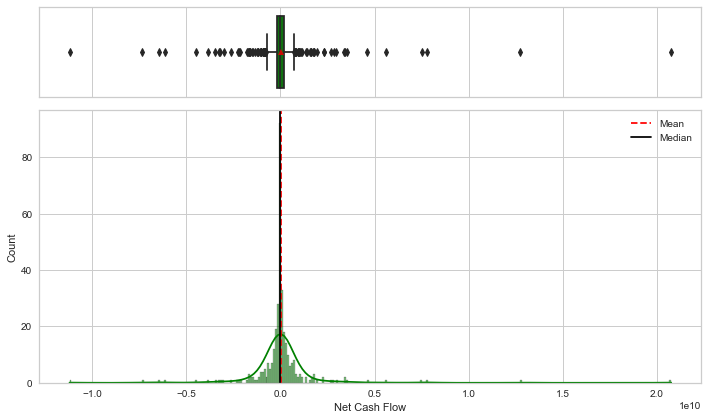

In [19]:
histogram_boxplot(df, "Net Cash Flow")

<h4>Observation:</h4>
-Net Cash Flow has an approiximate normal distribution
<br>-There is presence of outliers on both end.

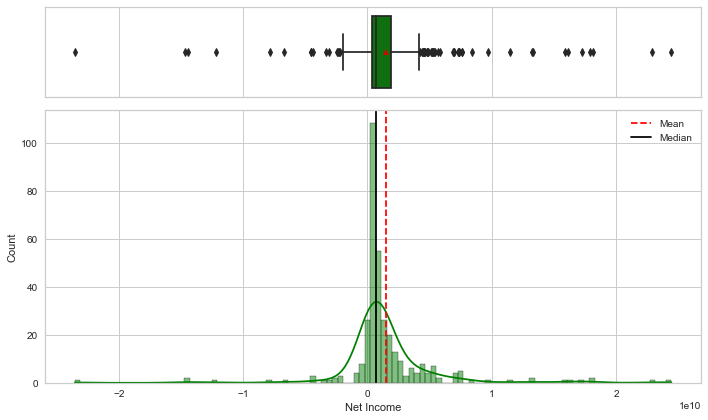

In [20]:
histogram_boxplot(df, "Net Income")

<h4>Observation:</h4>-The distribution of Net Income is nearly normal. <br>-However, there's presence of numerous outliers.

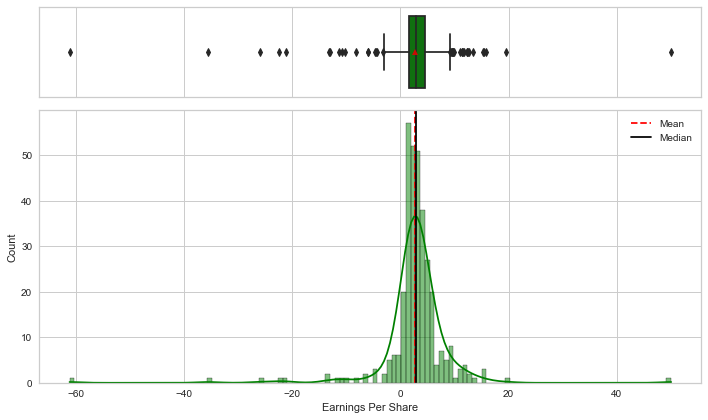

In [21]:
histogram_boxplot(df, "Earnings Per Share")

<h4>Observation:</h4>-Earnings per share has an approximate normal distribution, but a slightly longer tail on left.
<br>-There are presence of outliers on both ends

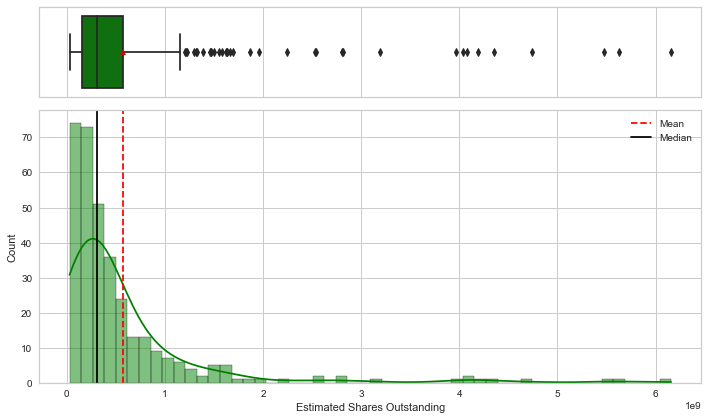

In [22]:
histogram_boxplot(df, "Estimated Shares Outstanding")


<h4>Observation:</h4>-Estimated Shares Outstanding has a high right skew.
<br>-It also has high number of outliers on the right.

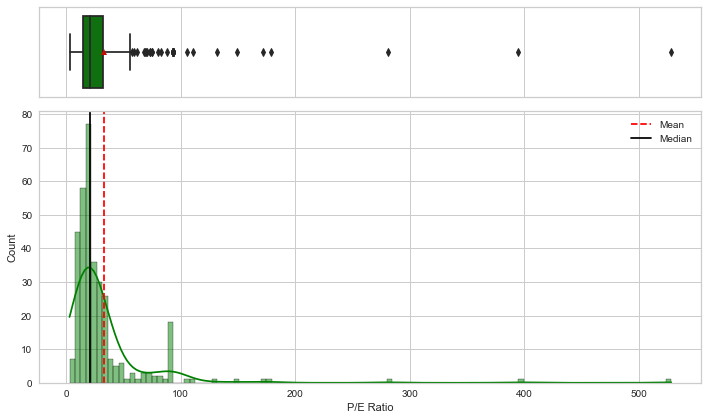

In [23]:
histogram_boxplot(df, "P/E Ratio")

<h4>Observation:</h4>
-P/E Ratio has a high right skew.
<br>-It also has high number of outliers on the right.

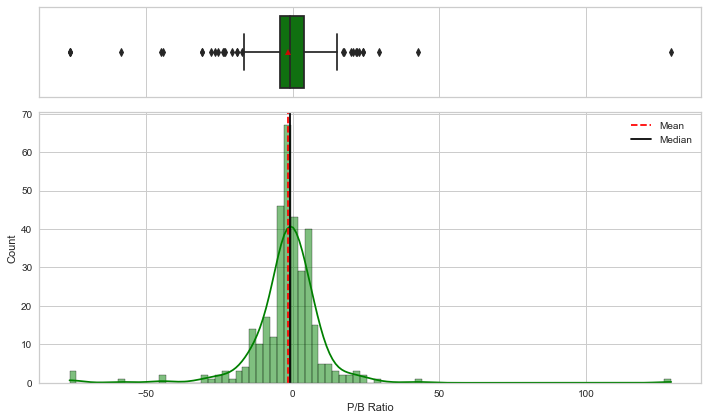

In [24]:
histogram_boxplot(df, "P/B Ratio")


<h4>Observation:</h4>
-P/B Ratio has an approximately normal distribution.
<br>-There are outliers on both ends.

<h3>Q-2 The stocks of which economic sector have seen the maximum price increase on average?


In [25]:
#Calculating average price increase across GICS Sectors
Avg_price_change= df.groupby("GICS Sector")["Price Change"].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price Change, dtype: float64


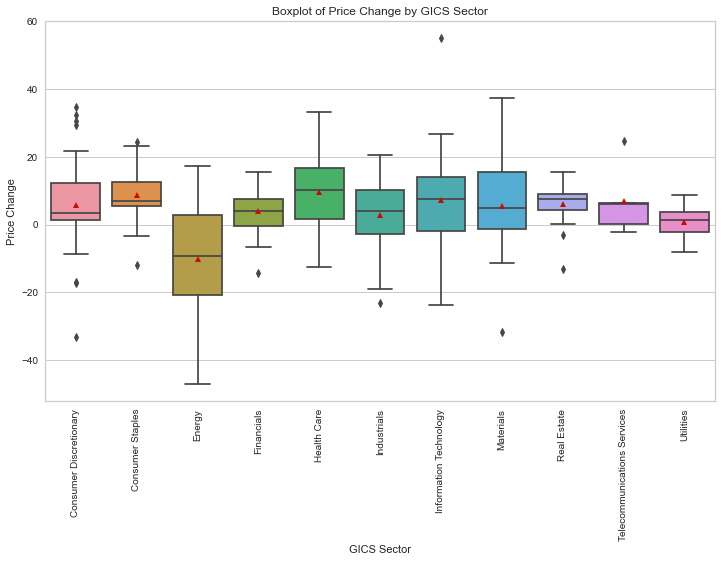

In [26]:
print(Avg_price_change)

#Creating a boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='GICS Sector', y='Price Change', data=df,showmeans=True)
plt.title('Boxplot of Price Change by GICS Sector')
plt.xticks(rotation=90)
plt.show()

<h4>Observation:</h4>
Healthcare sector had the maximum price increase on average

<h3>Q-3 How are the different variables correlated with each other?

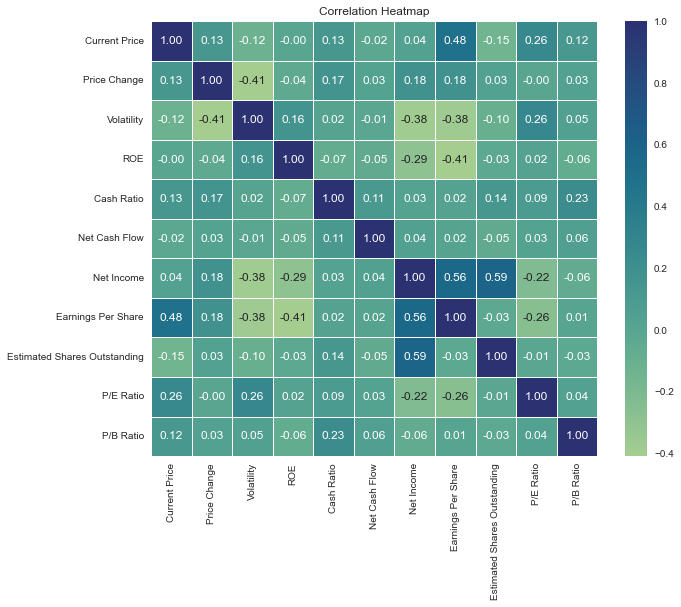

In [27]:
#Creating Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<h4>Observation:</h4>
-Net Income has a moderately high positive correlation with Earnings per share and Estimated Shares Outstanding at 0.56 and 0.59 respectively.



<h3>Q-4 How does the average cash ratio vary across economic sectors?


GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64


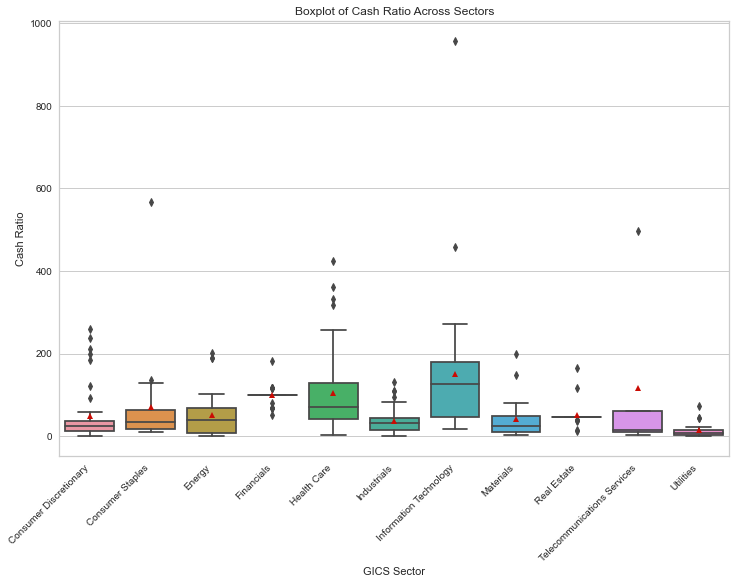

In [28]:
#Calculating average Cash Ratio across GICS Sectors
Avg_Cash_Ratio=df.groupby("GICS Sector")["Cash Ratio"].mean().sort_values(ascending=False)
print(Avg_Cash_Ratio)

plt.figure(figsize=(12, 8))

sns.boxplot(x='GICS Sector', y='Cash Ratio', data=df,showmeans=True)
plt.title('Boxplot of Cash Ratio Across Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('Cash Ratio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<h4>Observation:</h4>
-Average Cash Ratio is the highest in Information Technology Sector, followed by Telecommunication Services.
<br>-Utility has the least average Cash Ratio, followed by industrials and Materials.

<h3> Q-5 How does the P/E ratio vary, on average, across economic sectors?

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64


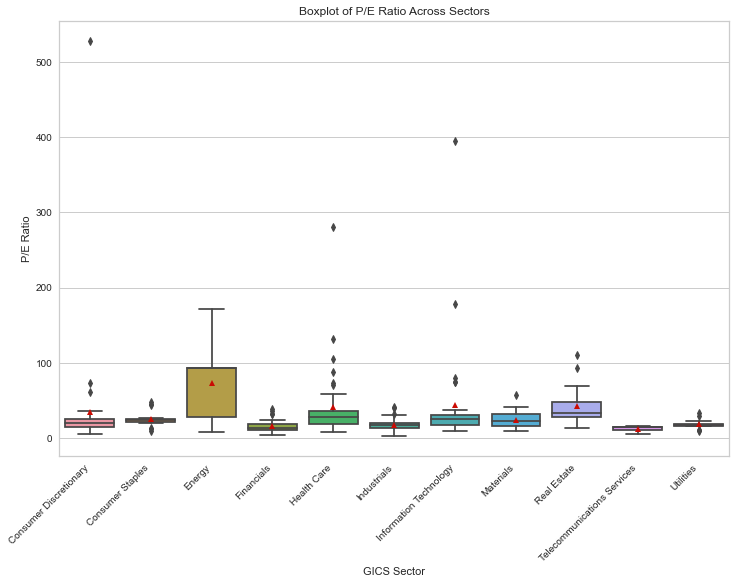

In [29]:
#Calculating average P/E Ratio across GICS Sectors
Avg_PE_Ratio=df.groupby("GICS Sector")["P/E Ratio"].mean().sort_values(ascending=False)
print(Avg_PE_Ratio)

plt.figure(figsize=(12, 8))
sns.boxplot(x='GICS Sector', y='P/E Ratio', data=df,showmeans=True)
plt.title('Boxplot of P/E Ratio Across Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('P/E Ratio')
plt.xticks(rotation=45, ha='right') 
plt.show()

<h4>Observation:</h4>
-P/E Ratio has the highest value in the Energy Sector, followed by Information Technology and Real Estate.
<br>-Energy Sector also has a much wider spread of P/E Ratio compared to others.
<br>-It is the least in Telecommunication Services, followed by Financials and Industrials.

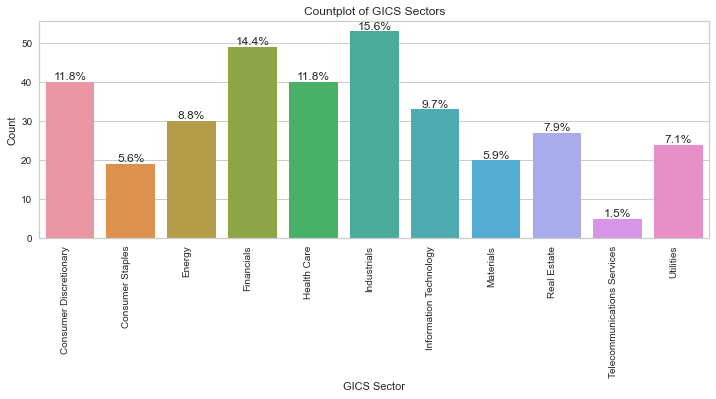

In [30]:
# Create a countplot
plt.figure(figsize=(12, 4))

ax = sns.countplot(x='GICS Sector', data=df)

#percentage of each class in the category
total = len(df['GICS Sector'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Countplot of GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right') 
plt.show()

<h4>Observation:</h4>
-Among the GICS sectors, Industrials has the highest number of securities in the dataset, followed Financials and Healthcare.
<br>-Telecommunication Services have the least number of securities.

<Figure size 1080x1080 with 0 Axes>

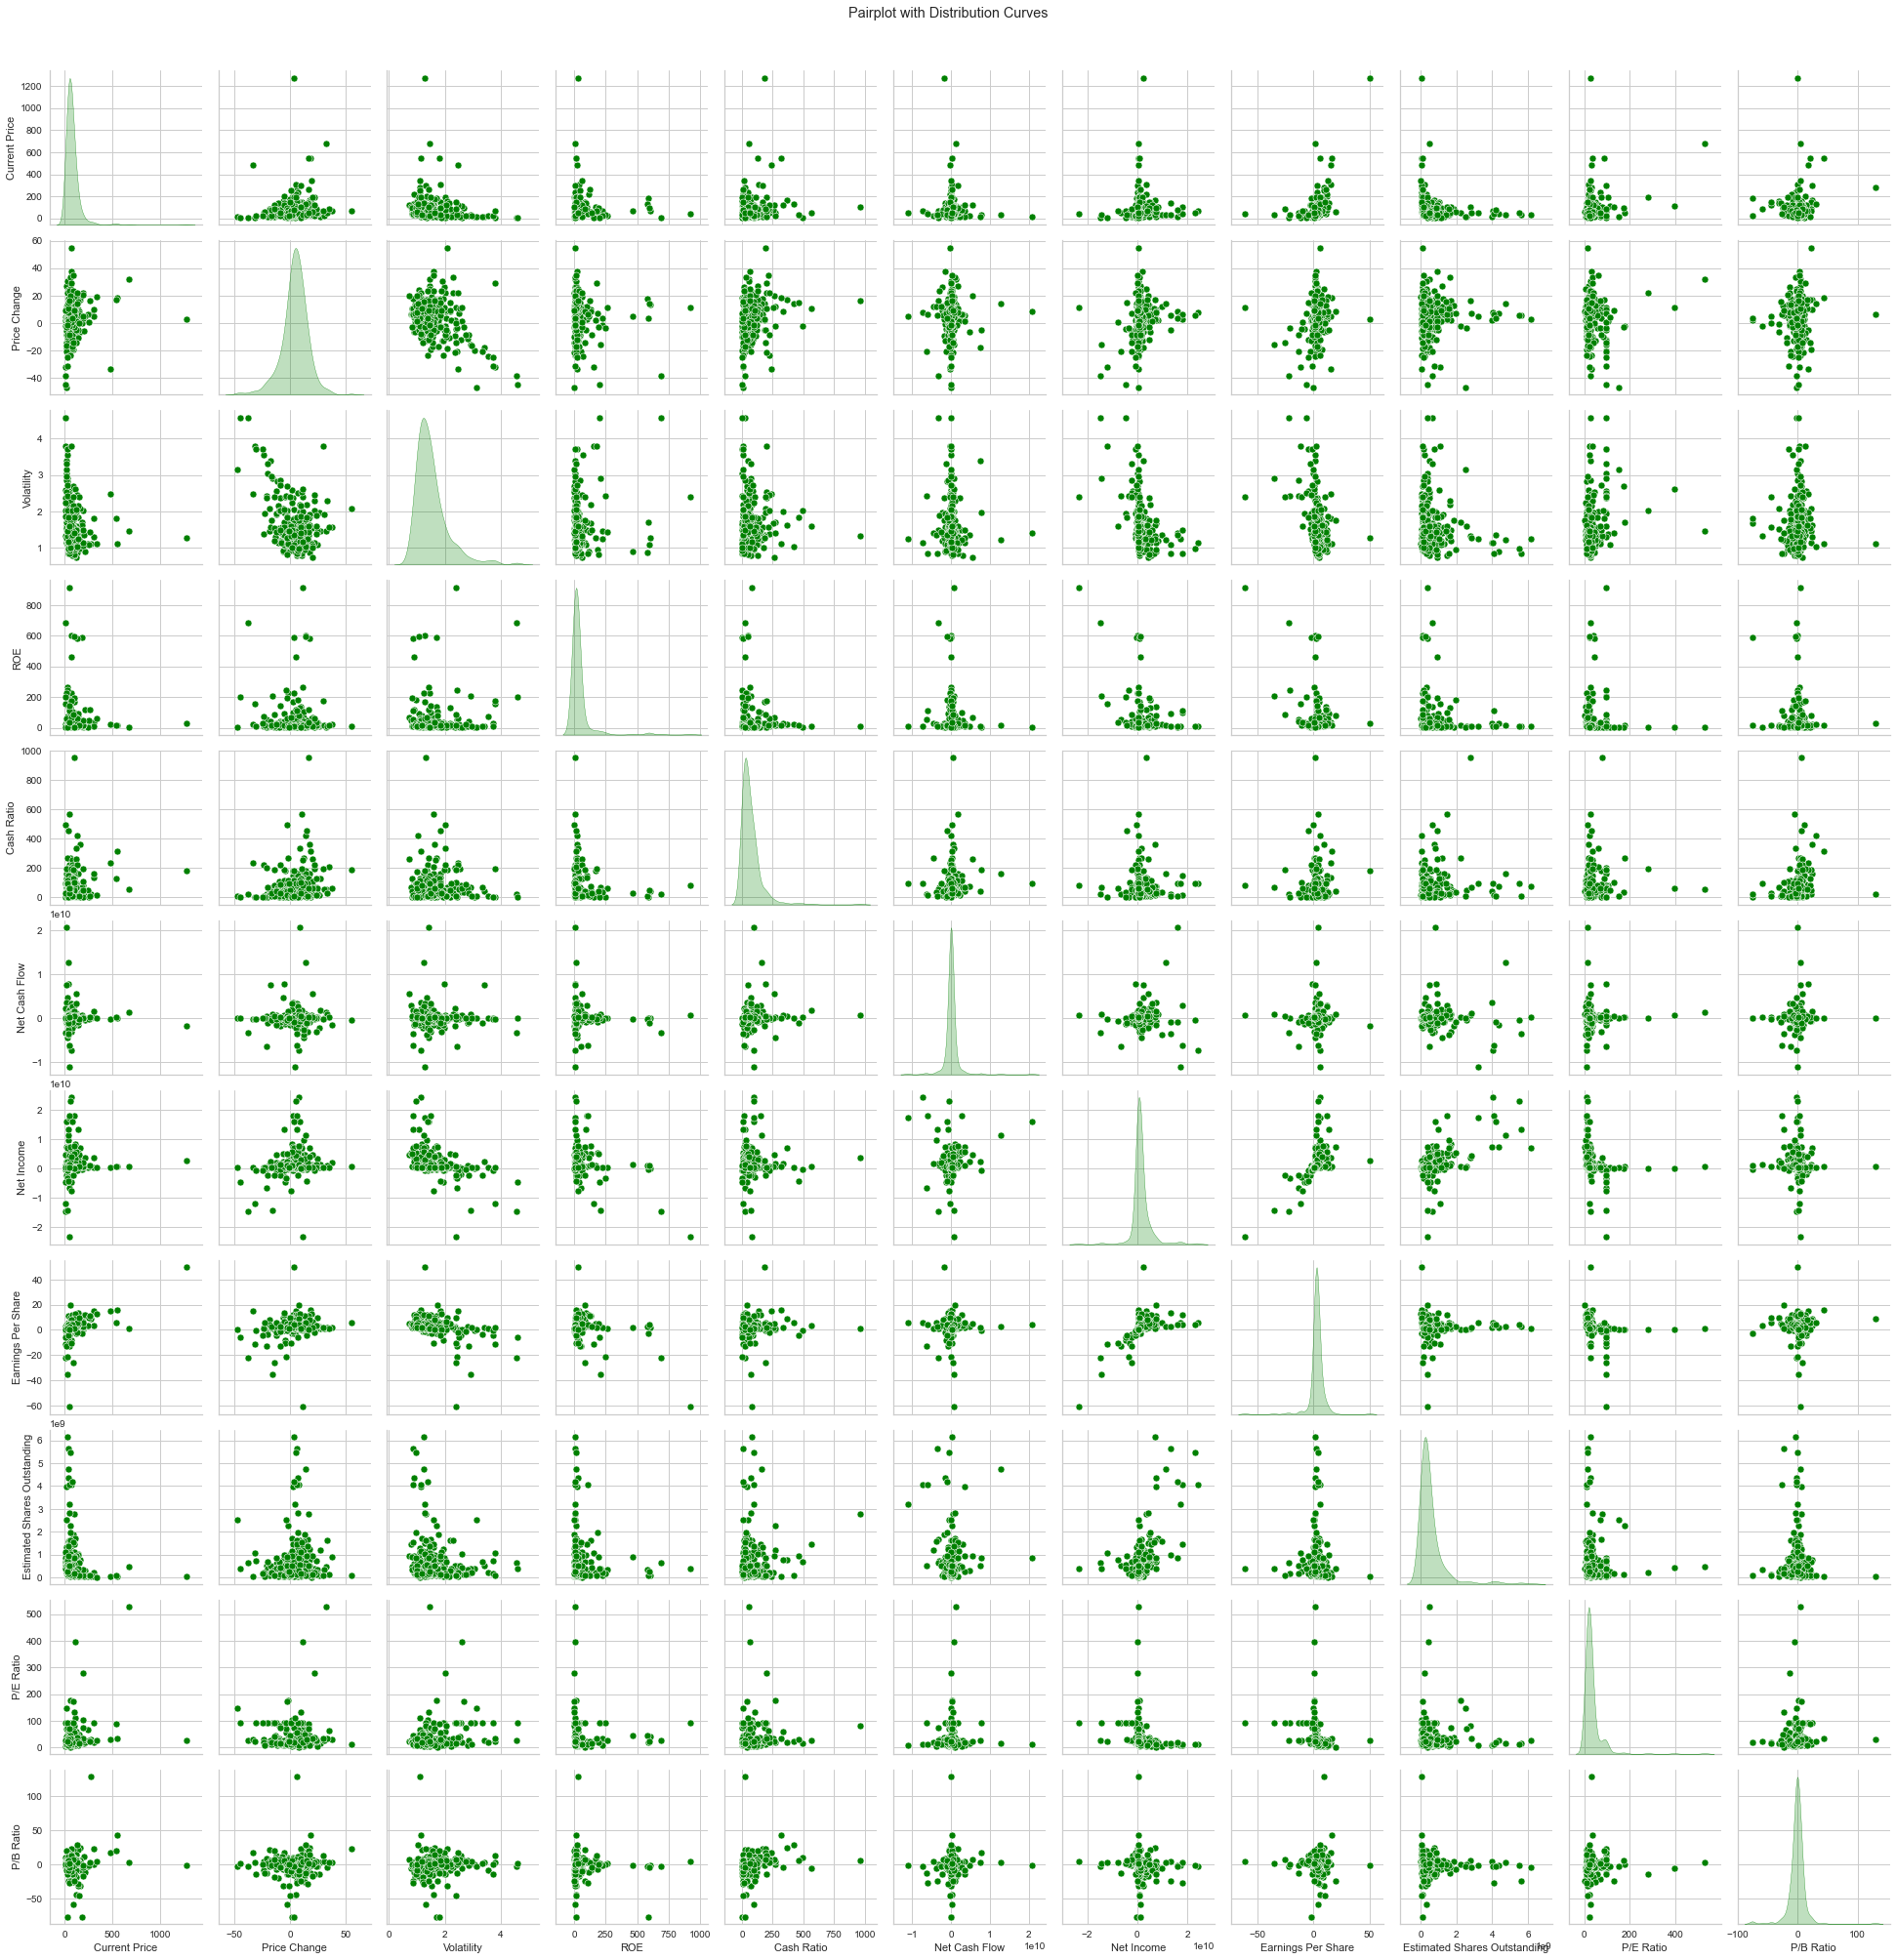

In [31]:
#Plotting Pairplot across numerical features
plt.figure(figsize=(15, 15))

sns.pairplot(df, plot_kws={'color': 'green'},diag_kind='kde',diag_kws={'color': 'green'})

plt.suptitle('Pairplot with Distribution Curves', y=1.02)
plt.show()

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [32]:
df.duplicated().sum()

0

In [33]:
df.isnull().sum().sum()

0

Since there are no duplicates and null values in the dataframe, it doesn't require any treatment  for those.

<h4>Outlier Treatment

Outlier Treatment
In financial datasets, extreme values can sometimes be valid and represent exceptional events. For eg, a sudden spike or drop in stock prices can be a legitimate outlier.
Therefore we'd not treat the outliers in the dataset.

<h4>Feature scaling

In [34]:
# Using StandardScaler to scale numerical columns excluding specified columns
scaler = StandardScaler()
subset_scaled_df = pd.DataFrame(
    scaler.fit_transform(df.drop(["Security", "GICS Sector", "GICS Sub Industry"],axis=1)),
    columns=df.drop(["Security", "GICS Sector", "GICS Sub Industry"],axis=1).columns,
)

subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## EDA

- It is a good idea to explore the data once again after manipulating it.

<Figure size 1080x1080 with 0 Axes>

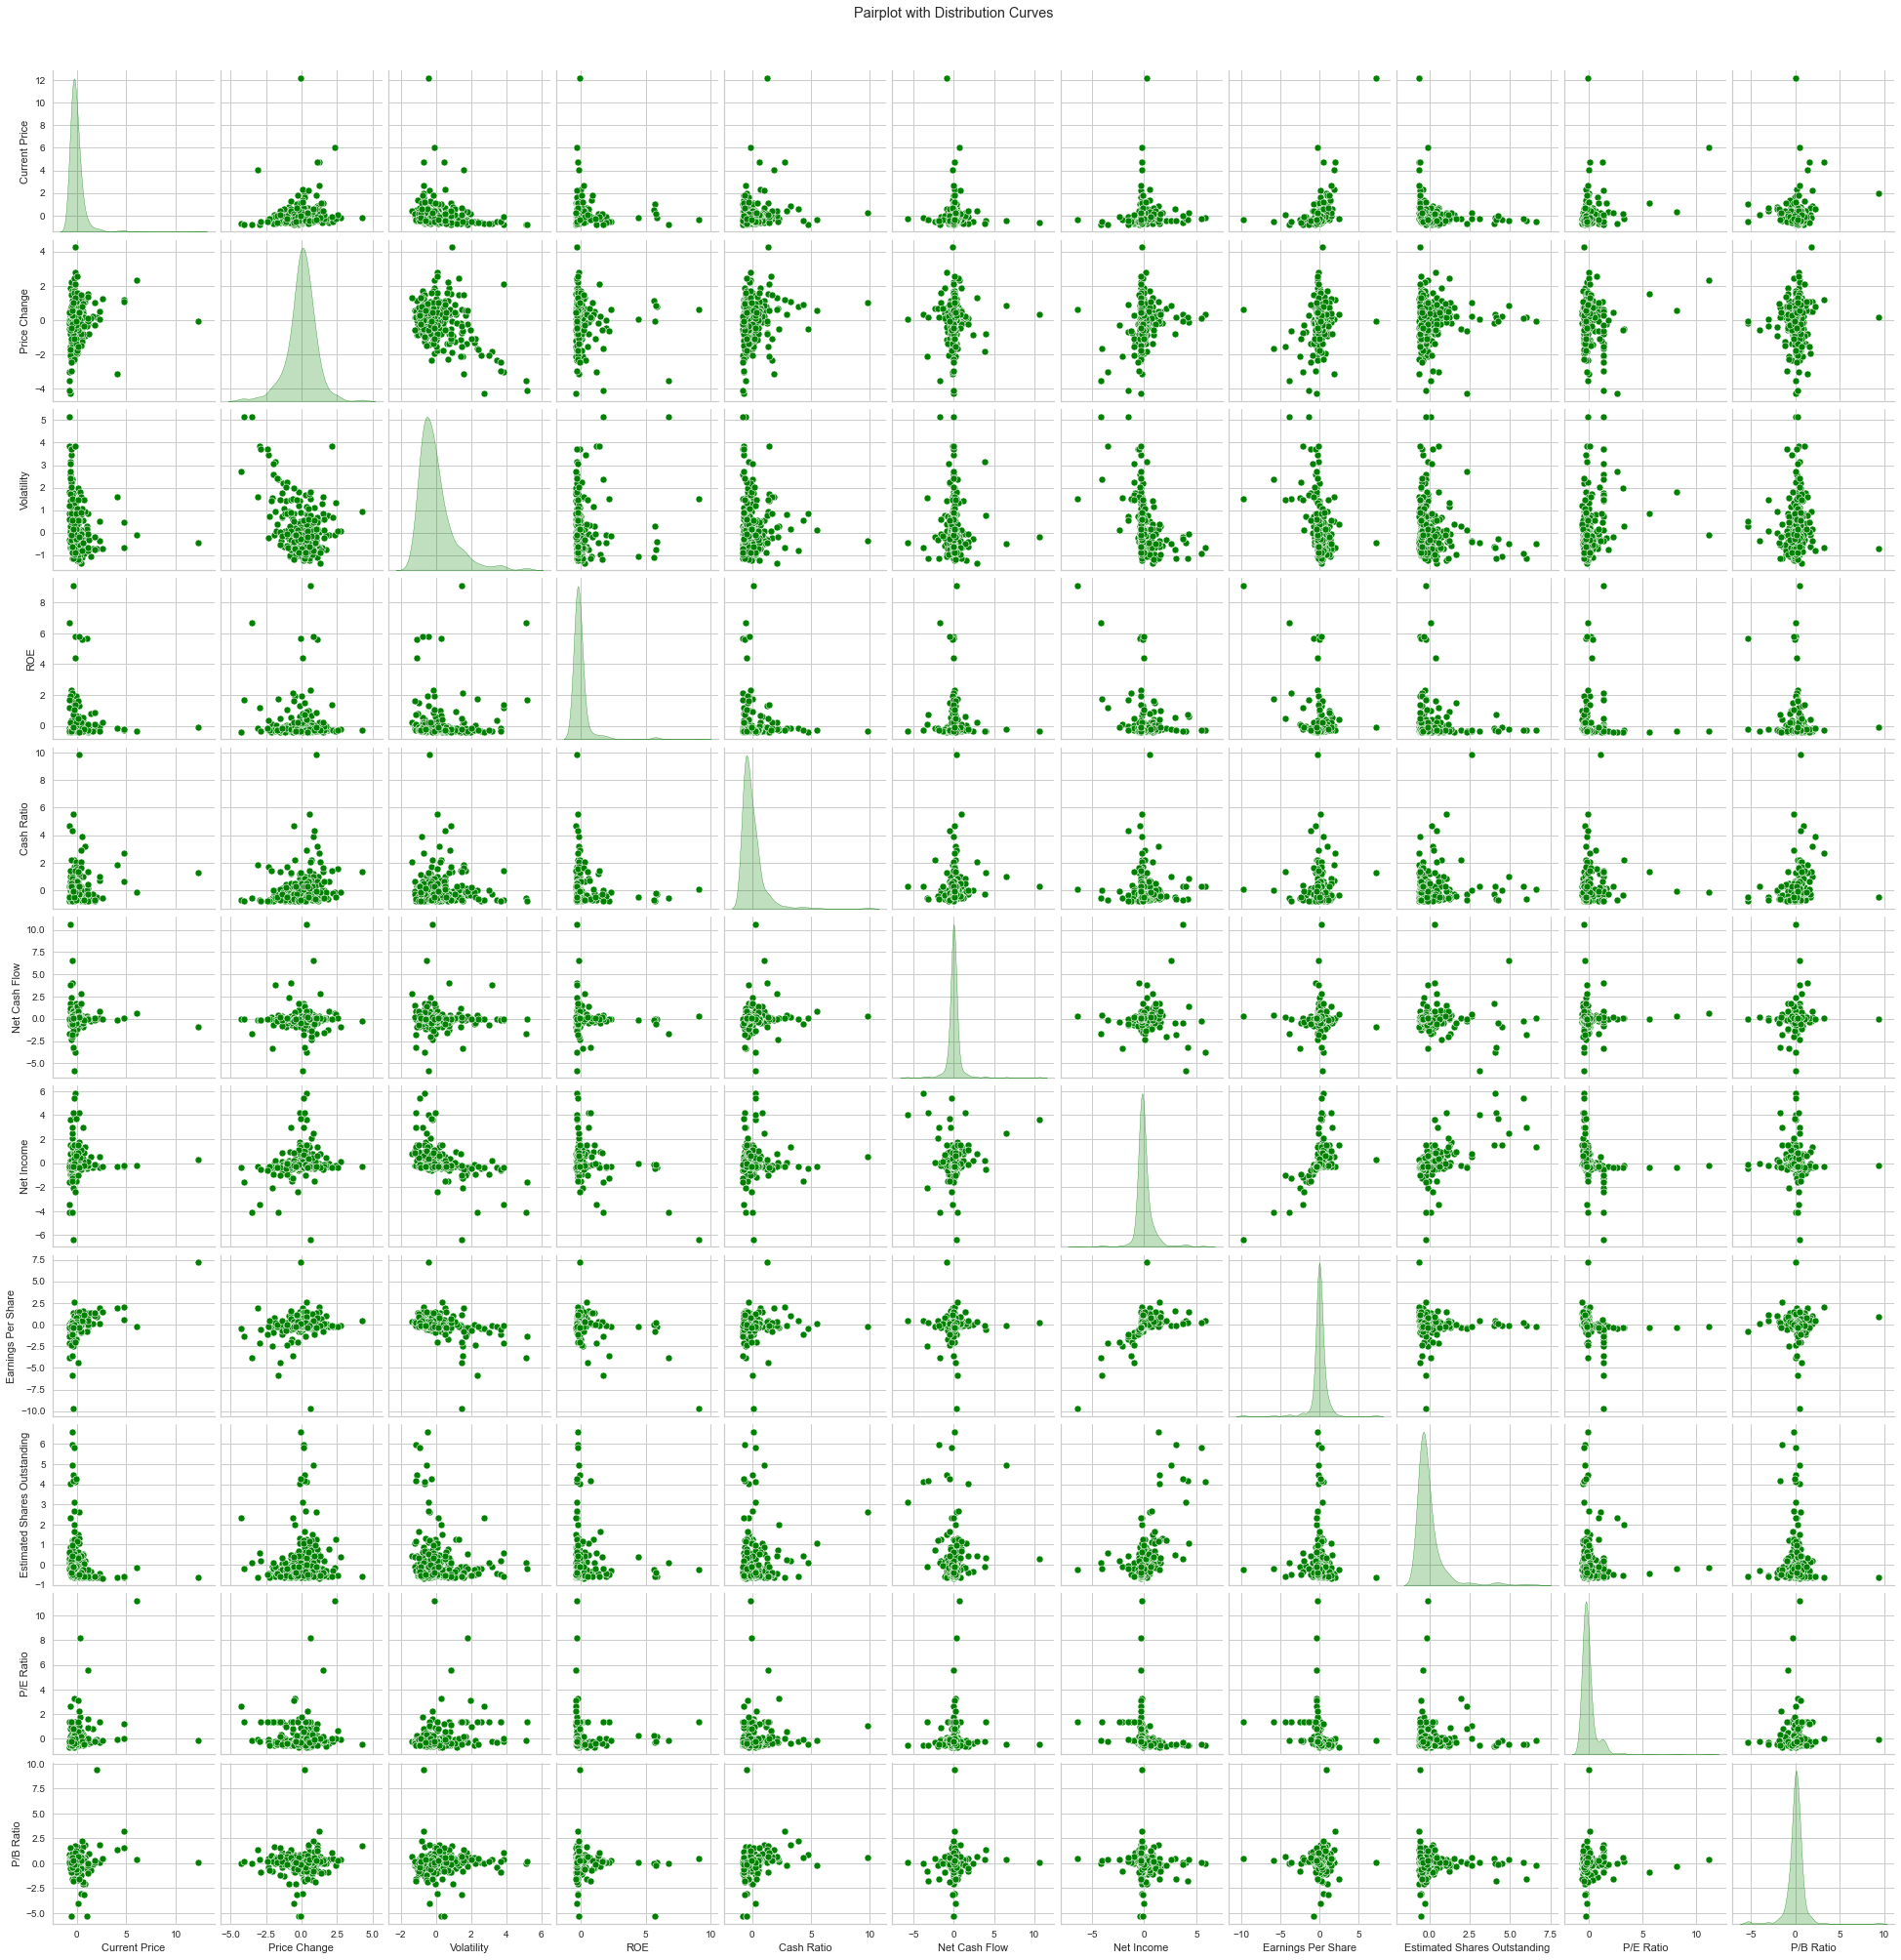

In [35]:
#Plotting Pairplot across numerical features
plt.figure(figsize=(15, 15))

sns.pairplot(subset_scaled_df, plot_kws={'color': 'green'},diag_kind='kde',diag_kws={'color': 'green'})

plt.suptitle('Pairplot with Distribution Curves', y=1.02)
plt.show()

<h4>Observation:</h4>
The distribution of the features hasn't changed much. Only the scale has schanged.

## K-means Clustering

In [36]:
#average distortions for range of kmeans models fitted to scaled dataset
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1416877467732736
Number of Clusters: 6 	Average Distortion: 2.082381015363427
Number of Clusters: 7 	Average Distortion: 2.0115955868227453
Number of Clusters: 8 	Average Distortion: 1.9644364294366403
Number of Clusters: 9 	Average Distortion: 1.9034160996122658
Number of Clusters: 10 	Average Distortion: 1.8677851793344065


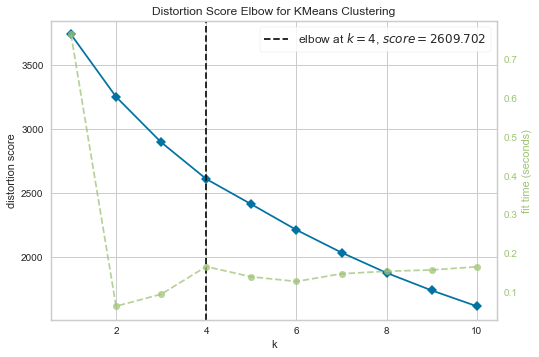

In [47]:
#fitting K-Means model and use visualizaer to indicate optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=True)
visualizer.fit(subset_scaled_df)  
visualizer.show()  
plt.show()

<h4>Observation:</h4>
As per the elbow plot, k=4 is the optimal

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)


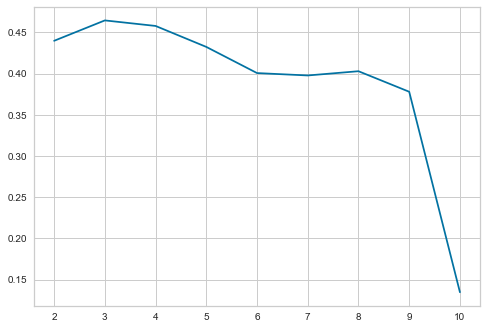

In [48]:
#Calculating silhouette scores for range of k clusters
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

#show scores in line graph
plt.plot(cluster_list, sil_score)
plt.show()

 <h4>Observation:</h4>
 Based on the silhouette scores, n_clusters = 3 appears to be a optimal choice

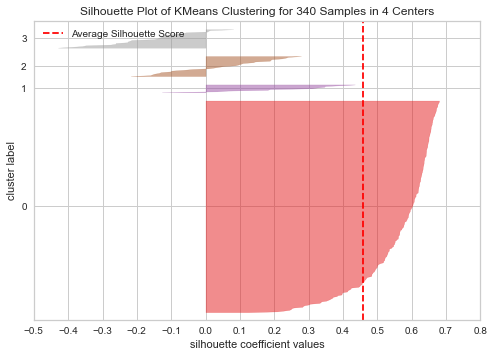

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

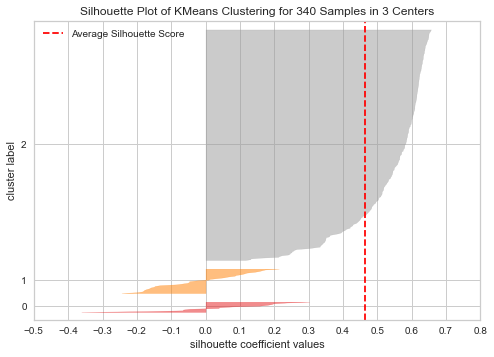

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

<h4>Observation:</h4>
Between the Elbow and Silhouette plots, the number of clusters with the best performance appears to be 4.
So we take k optimal as 4.

In [52]:
#Taking 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [53]:
# adding kmeans cluster labels to the original dataframe and scaled dataframes
df["K_mean_clusters"] = kmeans.labels_


# adding kmeans cluster labels to the scaled dataframes
subset_scaled_df["K_mean_clusters"] = kmeans.labels_

<h2>Cluster Profiling

In [56]:
cluster_profile = df.groupby("K_mean_clusters").mean()
cluster_profile.T

K_mean_clusters,0,1,2,3
Current Price,7.239911e+01,5.051727e+01,3.809926e+01,2.341709e+02
Price Change,5.066225e+00,5.747586e+00,-1.537033e+01,1.340069e+01
Volatility,1.388319e+00,1.130399e+00,2.910500e+00,1.729989e+00
ROE,3.462094e+01,3.109091e+01,1.070741e+02,2.560000e+01
Cash Ratio,5.300000e+01,7.590909e+01,5.003704e+01,2.776400e+02
Net Cash Flow,-1.404622e+07,-1.072273e+09,-1.594285e+08,1.554927e+09
Net Income,1.482212e+09,1.483309e+10,-3.887458e+09,1.572612e+09
Earnings Per Share,3.621029e+00,4.154545e+00,-9.473704e+00,6.045200e+00
Estimated Shares Outstanding,4.385338e+08,4.298827e+09,4.803986e+08,5.783163e+08
P/E Ratio,2.384366e+01,1.480358e+01,9.061922e+01,7.496082e+01


In [61]:
#count of data points in each cluster
cluster_profile["count"] = (df.groupby("K_mean_clusters")["Security"].count().values)

cluster_profile["count"]

K_mean_clusters
0    277
1     11
2     27
3     25
Name: count, dtype: int64

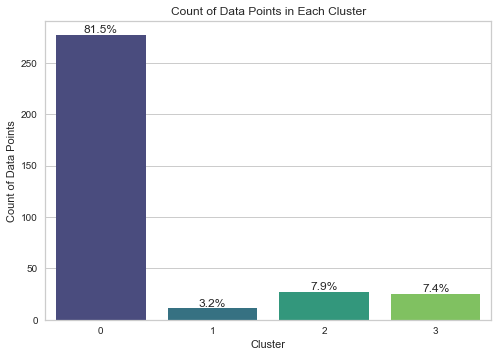

In [68]:
# Plotting the count of data points in each cluster
ax = sns.countplot(data=df, x='K_mean_clusters', palette='viridis')


total = len(df['K_mean_clusters'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Count of Data Points')
plt.title('Count of Data Points in Each Cluster')
plt.show()

<h4>Observation:</h4>
-Majority of the data points belong to cluster 0.
<br>-Cluster 1 has the least number of data points.

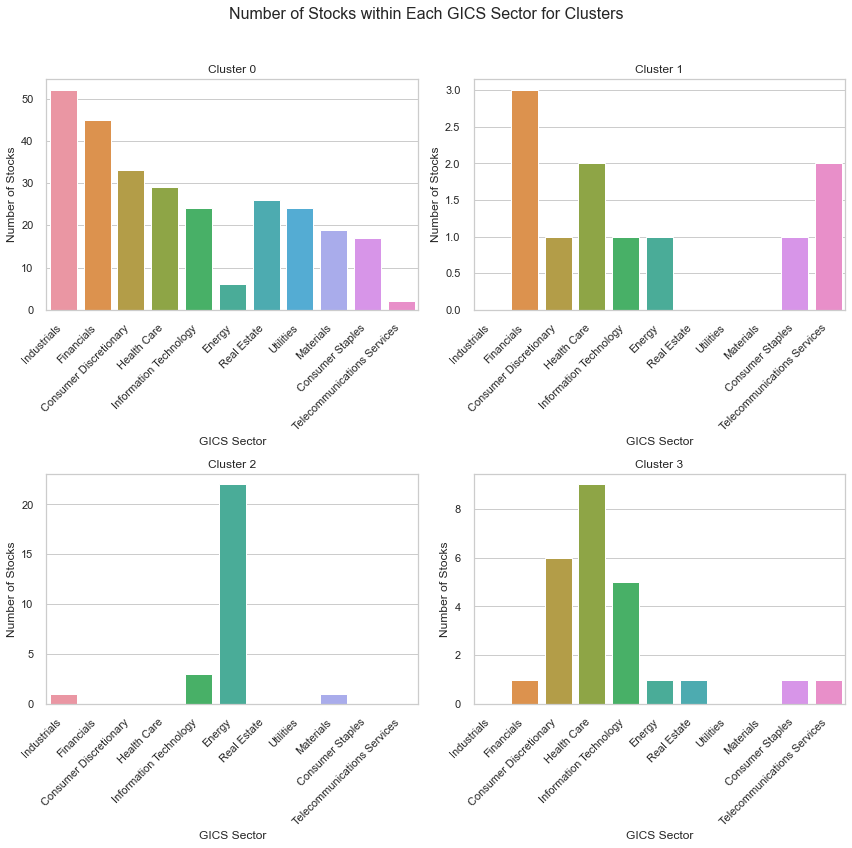

In [81]:
num_clusters = df['K_mean_clusters'].nunique()

# Create count plots number of Stocks within each GICS Sector under each Clusters
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Number of Stocks within Each GICS Sector for Clusters', fontsize=16)

for k, ax in zip(range(num_clusters), axes.flatten()):
    sns.countplot(data=df[df['K_mean_clusters'] == k], x='GICS Sector', order=df['GICS Sector'].value_counts().index, ax=ax)
    ax.set_title('Cluster ' + str(k))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel('GICS Sector')
    ax.set_ylabel('Number of Stocks')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


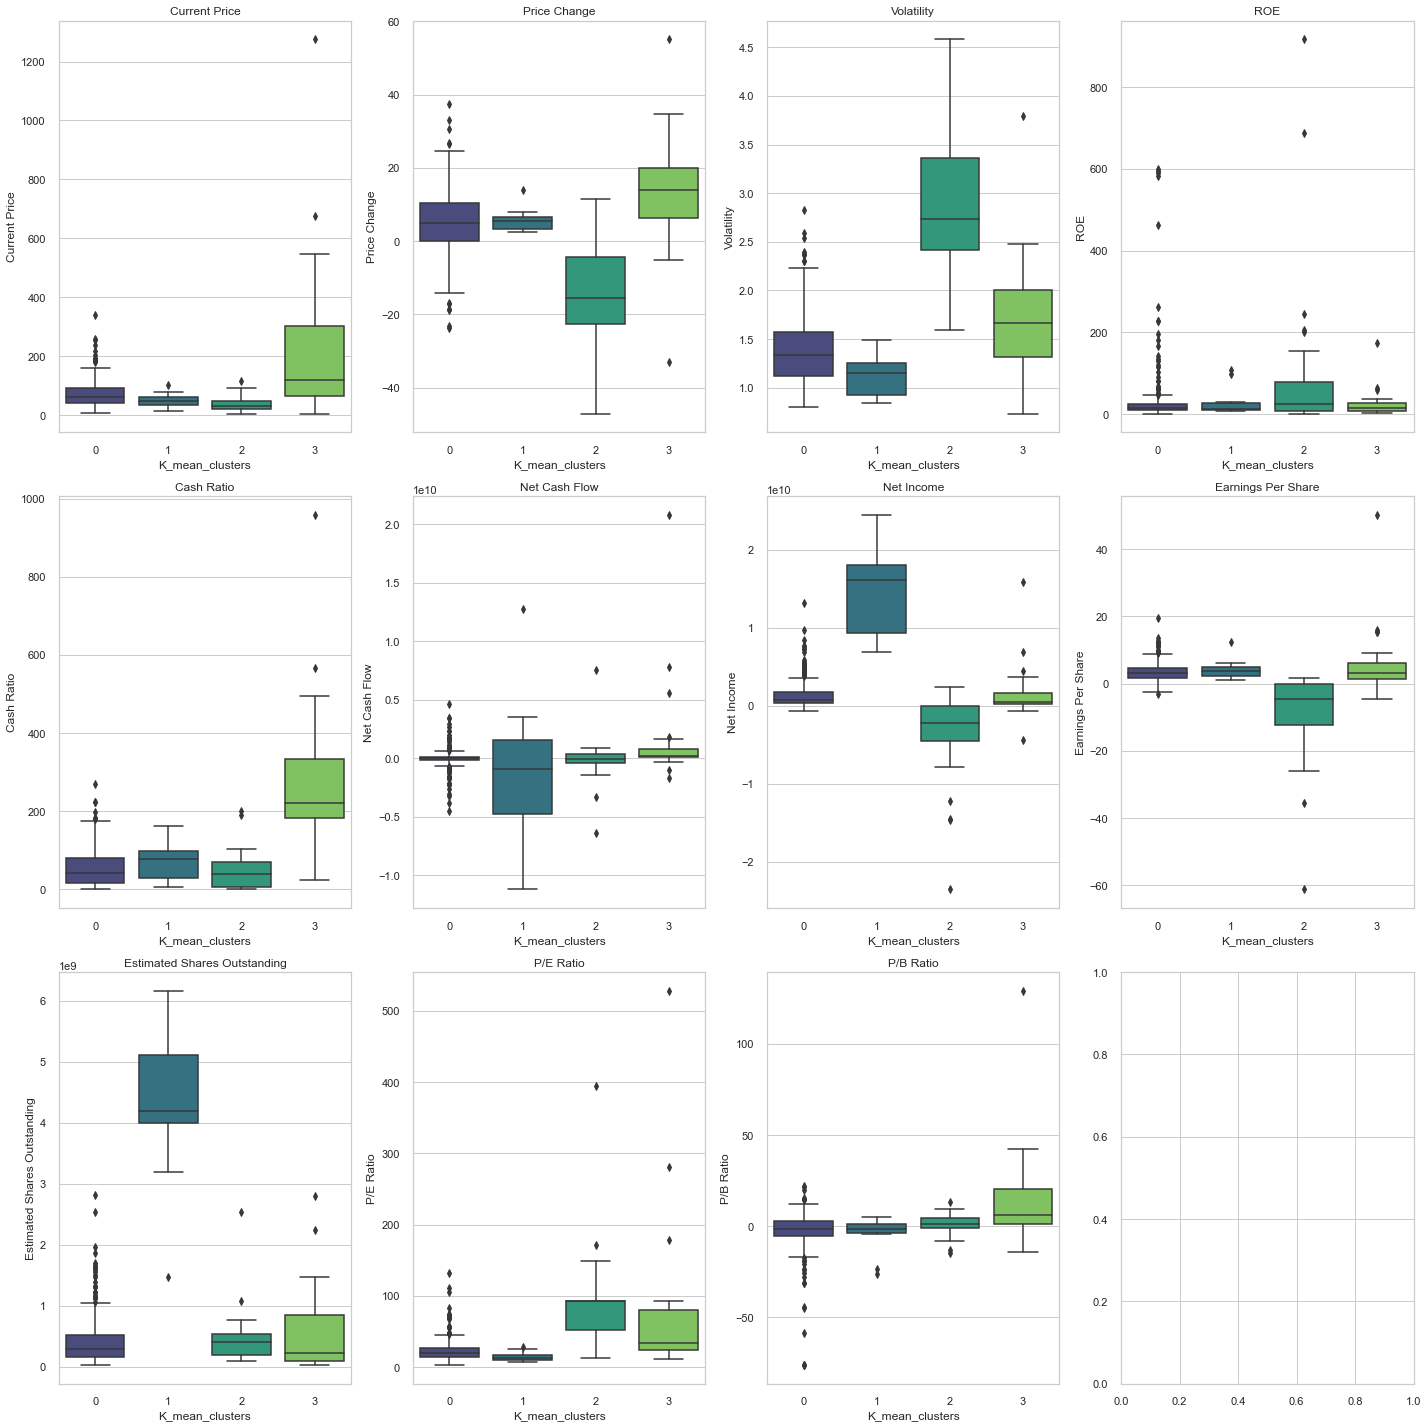

In [84]:
# Select numerical columns for boxplots
numerical_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow',
                     'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

#creating boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))

for i, column in enumerate(numerical_columns):
    row = i // 4
    col = i % 4
    
    sns.boxplot(x='K_mean_clusters', y=column, data=df, ax=axes[row, col], palette='viridis')
    
    axes[row, col].set_title(f'{column}')
    
    
plt.tight_layout()
plt.show()

<h4>Observation:</h4>

<b>Cluster 0:</b>
<br>-The cluster has representation from all the sectors.
<br>-It is dominated by stocks in the Industrials sector, followed by Financials and Consumer Discretionary.
<br>-This cluster exhibits a moderately high "Current Price" with the presence of outliers. 
<br>-It displays moderate volatility and an increase in price change over the past 13 weeks. 
<br>-The cluster shows positive "Net Income" and "Earnings Per Share," along with moderate "Return on Equity" (ROE) and "P/E Ratio." The "Cash Ratio" is also moderate.
<br>-However, the negative "Net Cash Flow" suggests more outflows than inflows, raising concerns about the company's ability to cover expenses. 
<br>-The negative "P/B Ratio" indicates more liabilities than assets but also suggests potential undervaluation.


<b>Cluster 1:</b>
<br>-Highly concentrated in the Financials sector, with limited representation in other sectors.
<br>-In this cluster, the "Current Price" is lower than in Cluster 0. It exhibits positive "Price Change" with lower "Volatility," indicating a more stable investment but potentially lower returns. 
<br>-The negative "Net Cash Flow" is concerning, but the cluster has the highest net income and moderately high "Earnings Per Share," indicating that the companies are making profits. 
<br>-"ROE" is lower, and both "P/E Ratio" and "P/B Ratio" are lower, suggesting a lower valuation relative to earnings, which might be considered a value investment opportunity. 
<br>-The cluster has a higher "Cash Ratio" and "Estimated Shares Outstanding."


<b>Cluster 2:</b>
<br>-Predominantly composed of Energy sector stocks, with a significant majority.
<br>-Information Technology has a limited representation, while other sectors have no or minimal presence.
<br>-This cluster has the lowest "Current Price" among all clusters and negative "Price Change," indicating a decrease in stock prices on average.
<br>-It shows very high volatility, making it a risky investment. 
<br>-Despite having the highest "ROE," it can be misleading as negative net income and negative shareholders' equity can create an artificially high ROE. 
<br>-The cluster has a moderate "Cash Ratio" and "Estimated Shares Outstanding."
The negative "Net Cash Flow" raises concerns about the company's ability to cover expenses.
<br>-It also has negative "Net Income" and "Earnings Per Share," indicating loss-making companies.
The highest "P/E Ratio" and moderate "P/B Ratio" are noteworthy.


<b>Cluster 3:</b>
<br>-Health Care is the dominant sector in this cluster, with a notable presence of Consumer Discretionary and Information Technology.
<br>-This cluster stands out with a much higher "Current Price" compared to other clusters, along with a greater spread.
<br>-The recent percentage change in price is positive with moderate volatility.
<br>-The cluster exhibits strong financial indicators, including the highest "Estimated Shares Outstanding" and "Cash Ratio." 
<br>-It also has a high "ROE," "P/E Ratio," and "P/B Ratio." 
<br>-Additionally, it shows positive "Net Cash Flow," "Net Income," and "Earnings Per Share," indicating robust financial performance.

## Hierarchical Clustering

In [98]:
#Removing the column K_mean_columns from original data and scaled data to perform hierarchical clustering:
subset_scaled_df.drop(columns=["K_mean_clusters"], axis=1, inplace=True)
df.drop(columns=["K_mean_clusters"], axis=1, inplace=True)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

In [101]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9348136687201084.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8068648172586538.
Cophenetic correlation for Euclidean distance and average linkage is 0.9430812027386503.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8795967011619817.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9183892376458014.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7089785554515078.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9312543234642285.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8940691072581505.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9399377800455895.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7976520544220668.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9408212209917823.
Cophenetic co

In [103]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9473439737746927, which is obtained with Cityblock distance and single linkage.


In [104]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9348136687201084.
Cophenetic correlation for complete linkage is 0.8068648172586538.
Cophenetic correlation for average linkage is 0.9430812027386503.
Cophenetic correlation for centroid linkage is 0.9380667223046197.
Cophenetic correlation for ward linkage is 0.7363291057504932.
Cophenetic correlation for weighted linkage is 0.8795967011619817.


In [105]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9430812027386503, which is obtained with average linkage.


<h4>Observation:</h4>
We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

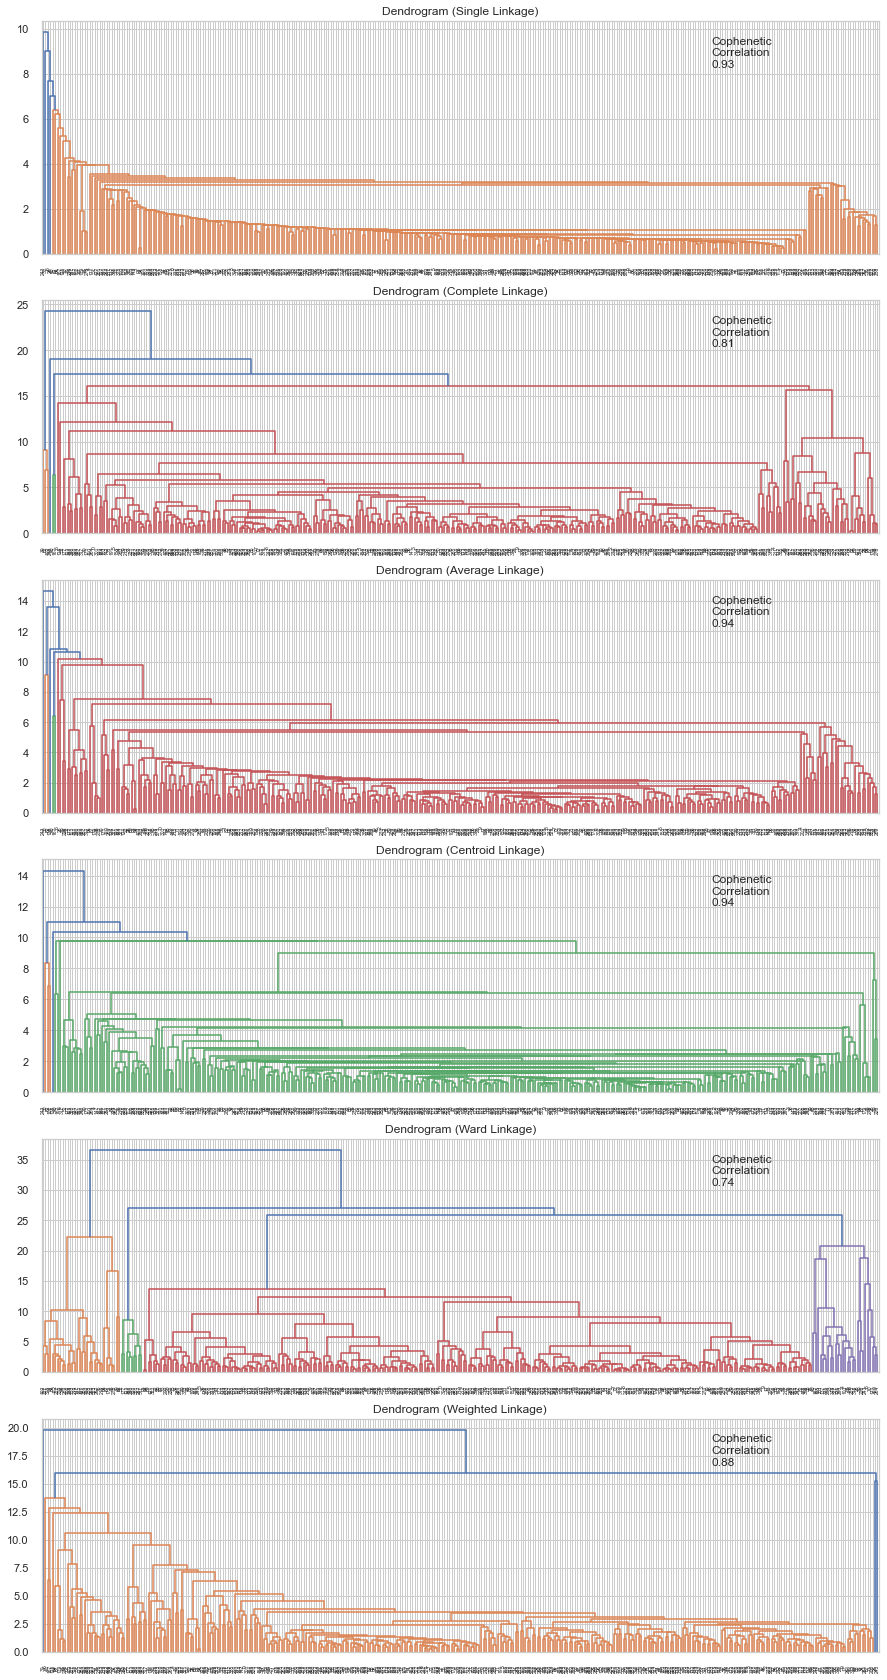

In [106]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

<h4>Observation:</h4>
-The highest cophenetic correlation is observed with the average and centroid linkage methods.
<br>-However, the Ward linkage method has more distinctly defined and evenly distributed clusters compared to others. 
<br>-Therefore, we opt for Euclidean distance coupled with Ward linkage and 4 clusters.

In [107]:
# Creating an instance of the AgglomerativeClustering model 
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")

# Fitting the model to the scaled subset of the dataframe
HCmodel.fit(subset_scaled_df)



AgglomerativeClustering(n_clusters=4)

In [108]:
# Assigning clustering labels to the "HC_Clusters" column in the scaled subset dataframe
subset_scaled_df["HC_Clusters"] = HCmodel.labels_

# Assigning clustering labels to the "HC_Clusters" column in the original dataframe
df["HC_Clusters"] = HCmodel.labels_

<h3>Cluster Profiling

In [112]:
# Calculating the mean values for each numeric variable within each cluster
cluster_profile = df.groupby("HC_Clusters").mean()

# Counting number of Companies/Securities in each cluster
cluster_profile["count_in_each_cluster"] = (df.groupby("HC_Clusters")["Security"].count().values
)

cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_cluster
HC_Clusters,,,,,,,,,,,,
0,46.558126,-11.798670,2.617878,178.750000,50.250000,43497156.250000,-3197471875.000000,-7.785312,473289495.126250,72.496532,-0.780467,32
1,211.414196,14.199594,1.749444,24.111111,270.925926,1491258740.740741,1849145666.666667,5.225926,750271389.734074,82.621295,13.051156,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,73.070235,4.905350,1.390112,25.246324,52.794118,16885647.058824,1569290191.176471,3.754320,440082367.476140,23.519276,-3.141262,272


<h4>Observation:</h4>
-Cluster 1 has highest values for Current Price,Price Change, Cash Ratio, Net Cash Flow,Earnings Per Share and P/E Ratio.
<br>-Cluster 0 has the maximum Volatility and ROE.
<br>-Cluster 2 has highest net income and Outstanding Shares.

In [113]:
cluster_profile.style.highlight_min(color="pink", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_cluster
HC_Clusters,,,,,,,,,,,,
0,46.558126,-11.798670,2.617878,178.750000,50.250000,43497156.250000,-3197471875.000000,-7.785312,473289495.126250,72.496532,-0.780467,32
1,211.414196,14.199594,1.749444,24.111111,270.925926,1491258740.740741,1849145666.666667,5.225926,750271389.734074,82.621295,13.051156,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,73.070235,4.905350,1.390112,25.246324,52.794118,16885647.058824,1569290191.176471,3.754320,440082367.476140,23.519276,-3.141262,272


<h4>Observation:</h4>
-Cluster 0 has negative and lowest  net income, Price Change and Earnings Per Share on average. The current price and cash ratio are also the lowest n average
<br>-Cluster 1 has the lowest average ROE
<br>-Cluster 2 has lowest average volatility and P/E Ratio and negative and lowest average Net Cash Flow.
<br>-Cluster 3 has lowest Estimated Shares Outstanding

In [114]:

cluster_profile["count_in_each_cluster"]


HC_Clusters
0     32
1     27
2      9
3    272
Name: count_in_each_cluster, dtype: int64

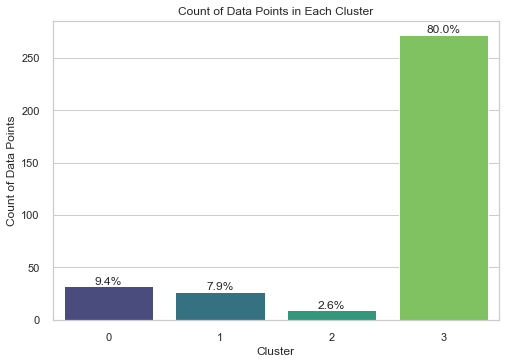

In [116]:
# Plotting the count of data points in each cluster
ax = sns.countplot(data=df, x='HC_Clusters', palette='viridis')


total = len(df['HC_Clusters'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Count of Data Points')
plt.title('Count of Data Points in Each Cluster')
plt.show()

<h4>Observation:</h4>
Cluster 3 has the highest number of data points and Cluster 0 has the least.

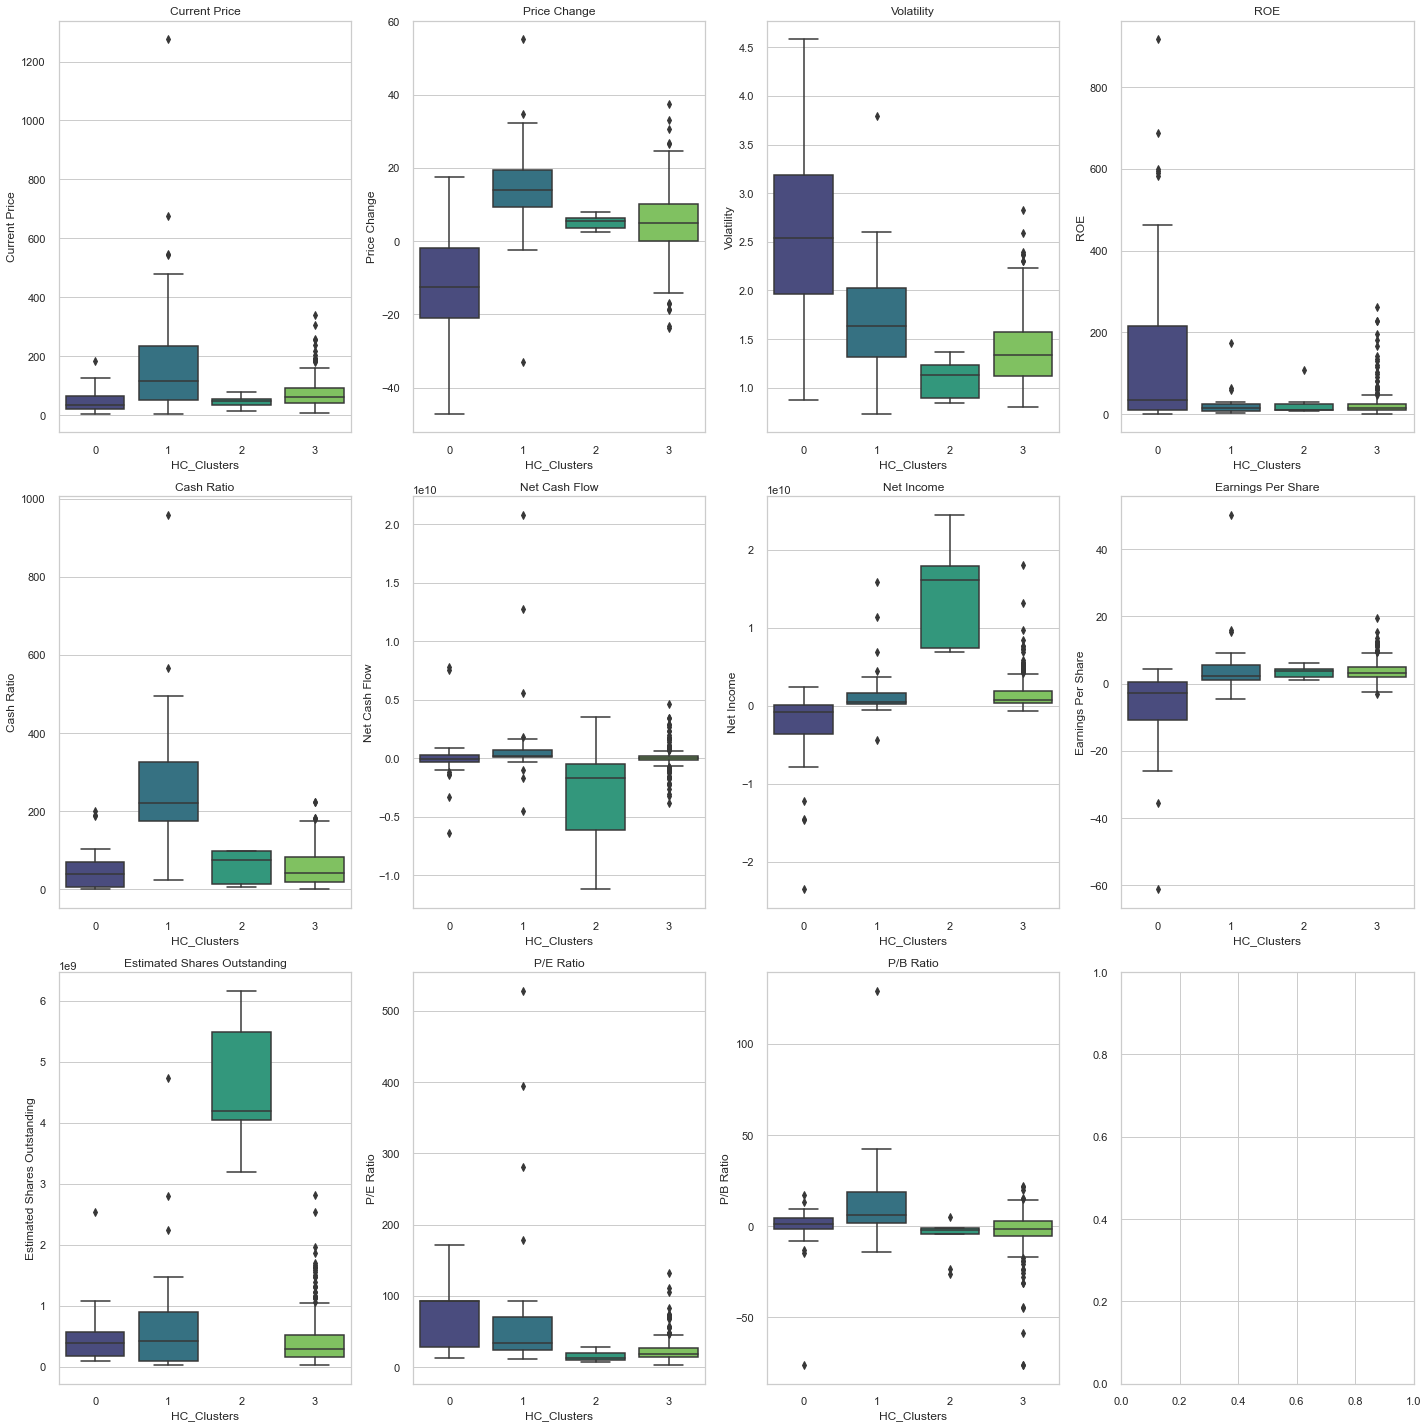

In [125]:
# Select numerical columns for boxplots
numerical_columns = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow',
                     'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

#creating boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))

for i, column in enumerate(numerical_columns):
    row = i // 4
    col = i % 4
    
    sns.boxplot(x='HC_Clusters', y=column, data=df, ax=axes[row, col], palette='viridis')
    
    axes[row, col].set_title(f'{column}')
    
    
plt.tight_layout()
plt.show()

<h4>Observation:</h4>
<b>Cluster 0:</b>
<br>-Dominated by the Energy sector with a significant number of stocks.
<br>-Limited representation from Health Care, Real Estate, Telecommunications Services, and Utilities.
<br>-Exhibits the lowest current price but is comparable to Cluster 2, with a narrow range.
<br>-Negative price change and the highest volatility over the past 13 weeks indicating high riskiness.
<br>-Positive and high net cash flow.
<br>-Income and earnings per share are negative and the lowest, indicating losses. However, ROE is much higher, potentially inflated by negative net income and negative shareholders' equity.
<br>-High P/E score and negative P/B Ratio, signaling elevated risk.

<b>Cluster 1:</b>
<br>-Well-diversified cluster with representation from various sectors.
<br>-Strong presence in Health Care, Information Technology, and Consumer Discretionary.
<br>-Highest current price, highest positive change in price with moderate volatility over the past 13 weeks.
<br>-ROE is the lowest but comparable to Cluster 2 and 3.
<br>-Cash Ratio and net cash flow are the highest, indicating strong liquidity and financial health.
<br>-Net income is moderately high and positive.
<br>-Highest Earnings Per Share (EPS), P/E, and P/B ratio, typically suggesting strong profitability and investor confidence.

<b>Cluster 2:</b>
<br>-Lowest number of securities in this cluster, representing 2.6% of data points.
<br>-Predominance of Financials, followed by Telecommunications Services.
<br>-Limited representation in Consumer Discretionary, Consumer Staples, and Energy.
<br>-Current price is comparable to Cluster 0. Low but positive price change and the lowest volatility over the past 13 weeks suggest low risk but smaller gains.
<br>-Highest net income and moderate and positive earnings per share, indicating robust profitability.
<br>-Highest net cash outflows mitigated by positive and moderate values of ROE and cash ratio.
<br>-Lowest P/E and negative and lowest P/B, signaling a cautious investment approach.

<b>Cluster 3:</b>
<br>-Highest number of securities in this cluster, representing 80% of datapoints.
<br>-High representation in Industrials, Financials, and Consumer Discretionary.
<br>-Well-distributed across multiple sectors, showcasing diversity.
<br>-High current price, low but positive price change with low volatility, indicating stability with small gains.
Cash Ratio and ROE are moderately high.
<br>-Low but positive net cash flow.
<br>-Net income is on the lower side but positive, with moderate but positive earnings per share, suggesting stable profitability.
<br>-Lowest Estimated Shares Outstanding.
<br>-Low but positive P/E and negative and negative P/B.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

<b>Which clustering technique took less time for execution?</b>
<br>Agglomerative Clustering model took more time compared to K-means Clustering.In plotting Dendrograms


<b>Which clustering technique gave you more distinct clusters, or are they the same?</b>
<br>Both algorithms give similar clusters. In K-means Clustering, cluster 0  consisted of approximately 81.5% of the stocks and in Agglomerative Clustering, Cluster 3 consisted of approximately 80% of the stocks.Cluster 3 in K-means clustering seem analogous to Cluster 1 in Agglomerative Clustering, and cluster 2 in K-Means is analogous to Cluster 0 in Agglomerative Clustering. 

<b>How many observations are there in the similar clusters of both algorithms?</b>
<br>For K-means clustering:
<br>Cluster 0 has 277 observations.
<br>Cluster 1 has 11 observations.
<br>Cluster 2 has 27 observations.
<br>Cluster 3 has 25 observations.

For Hierarchical Clustering:
<br>Cluster 0 has 32 observations.
<br>Cluster 1 has 27 observations.
<br>Cluster 2 has 9 observations.
<br>Cluster 3 has 272 observations.
<br>There are 277 observations in Cluster 0 for K-means and 272 observations in Cluster 3 for Hierarchical Clustering that seem to be similar.

<b>How many clusters are obtained as the appropriate number of clusters from both algorithms?</b>
<br>For both K means and Heirarchical clustering, the appropriate number of clusters are 4

## Actionable Insights and Recommendations
We consider clusters from Hierarchical Clustering.

<br><b>Cluster 0: - High risk:</b>
<br>-These stocks are High risk due to negative earnings and inflated ROE.
<br>-These can be tailored for investors seeking potentially high-risk, high-reward opportunities.
<br>-As this cluster entails higher volatility and the potential for losses itm ay be suitable for those with a higher risk tolerance, aiming for substantial returns in a speculative market.

<b>Cluster 1: - Stable Performers:</b>
<br>-The secuities in this cluster show moderate risk with strong financial health.
<br>-This cluster exhibits strong financial health, positive metrics, and reliable liquidity and can be recommended for investors looking for stability without compromising on potential returns.

<b>Cluster 2 - Moderate risk with strong financial health:</b>
<br>-These securities have a low risk, but limited growth potential.
<br>-Can be recommended for risk-averse investors prioritizing stability over high returns.
<br>-The returns are modest, but the cluster provides a secure and steady financial environment.

<b>Cluster 3 - Moderate risk with stable profitability:</b>
<br>-The secuities in this cluster exhibit moderate risk with stable profitability.
<br>-This is a well-diversified cluster which offers stability, moderate profitability, and a balanced risk profile. It can be <br>-recommended for those seeking a reliable investment with moderate growth potential.


<br>-In both K-means and Agglomerative Clustering, high-risk clusters were primarily influenced by the energy sector. Given the volatility of energy stocks, diversifying into other sectors is advisable for a more balanced portfolio.

<br>-Cluster 1 exhibits a robust presence of Health Care and Information Technology stocks, indicating innovation and growth potential. Investing in securities from these sectors can yield substantial and stable returns.